# Load The Dataset

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

FILENAME = "train.csv"
df = pd.read_csv(FILENAME)
df.columns

Index(['Year', 'S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9',
       'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19',
       'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29',
       'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39',
       'S40', 'S41', 'S42', 'S43', 'S44', 'S45', 'S46', 'S47', 'S48', 'S49',
       'S50', 'S51', 'S52', 'S53', 'S54', 'S55', 'S56', 'S57', 'S58', 'S59',
       'S60', 'S61', 'S62', 'S63', 'S64', 'S65', 'S66', 'S67', 'S68', 'S69',
       'S70', 'S71', 'S72', 'S73', 'S74', 'S75', 'S76', 'S77', 'S78', 'S79',
       'S80', 'S81', 'S82', 'S83', 'S84', 'S85', 'S86', 'S87', 'S88', 'S89'],
      dtype='object')

# Split The Dataset

In [54]:
from sklearn.model_selection import train_test_split

def my_train_test():
    X = df.iloc[:, 1:]
    y = df[["Year"]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return(X_train, X_test, y_train, y_test)

def my_train_validation_test():
    X = df.iloc[:, 1:]
    y = df[["Year"]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
    return(X_train, X_val, y_train, y_val, X_test, y_test)

In [55]:
X_train, X_test, y_train, y_test = my_train_test()

# Show Data Distribution

In [56]:
import matplotlib.pyplot as plt

def histogram(column_name):
    data = X_train[column_name]
    plt.hist(data)
    plt.show()

def all_histograms(df):
    for col in df.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Istogramma della colonna {col}')
        plt.xlabel('Valore')
        plt.ylabel('Frequenza')
        plt.grid(True)
        plt.show()

def boxplot_y():
    data = y_train["Year"]
    plt.boxplot(data, whis=1.5)
    plt.show()

def density_plots(df):
    for col in df.columns:
        plt.figure(figsize=(8, 6))
        sns.displot(df[col], kind="kde", fill=True)
        plt.title(f'Densità di probabilità della colonna {col}')
        plt.xlabel('Valore')
        plt.ylabel('Densità')
        plt.grid(True)
        plt.show()

# Pre-processing

In [57]:
#pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

In [58]:
#Normalization
def plot_norm(x, x_normalized):
    plt.subplot(2, 1, 1)
    plt.plot(x)
    plt.subplot(2, 1, 2)
    plt.plot(x_normalized)
    plt.show()

def norm(df, column_name, order):
    x = df[column_name]
    x_norm1 = np.linalg.norm(x, ord=order)
    x_normalized = x / x_norm1
    df[column_name] = x_normalized

    if order == 1:
        print(sum(x_normalized))
    if order == 2:
        print(sum(x_normalized**2))
    if order == np.inf:
        print(max(x_normalized))

def min_max_sc(X_val = None):
    #MinMax Scaling
    min_max_scaler = preprocessing.MinMaxScaler()
    min_max_scaler.fit(X_train)
    X_train_minmax = min_max_scaler.transform(X_train)
    X_test_minmax = min_max_scaler.transform(X_test)
    if X_val is not None:
        X_val_minmax = min_max_scaler.transform(X_val)
        return (X_train_minmax, X_test_minmax, X_val_minmax)
    else:
        return (X_train_minmax, X_test_minmax)

def standardization(X_val = None):
    #Standardization
    scaler = preprocessing.StandardScaler()
    #Addestramento
    scaler.fit(X_train)
    #Applicazione
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    if X_val is not None:
        X_val_scaled = scaler.transform(X_val)
        return (X_train_scaled, X_test_scaled, X_val_scaled)
    else:
        return (X_train_scaled, X_test_scaled)

X_train_norm1 = X_train.copy()
X_train_norm2 = X_train.copy()
X_train_normInf = X_train.copy()

In [59]:
X_train_minmax, X_test_minmax = min_max_sc()
X_train_scaled, X_test_scaled = standardization()

PCA

In [70]:
from sklearn.decomposition import PCA

def f_pca(num_components = None, X_val_scaled = None):
    if num_components is not None:
        pca = PCA(n_components=num_components)
    else: pca = PCA()
    principals_components_train = pca.fit_transform(X_train_scaled)

    # Trasforma il set di test utilizzando la stessa PCA addestrata sul set di addestramento
    principals_components_test = pca.transform(X_test_scaled)

    #loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)], index=X_train.columns)
    #print(loadings)
    if X_val_scaled is not None:
        principals_components_val = pca.transform(X_val_scaled)
        return (principals_components_train, principals_components_test, principals_components_val, pca)
    else:
        return (principals_components_train, principals_components_test, pca)

In [71]:
principals_components_train, principals_components_test, pca = f_pca(54)

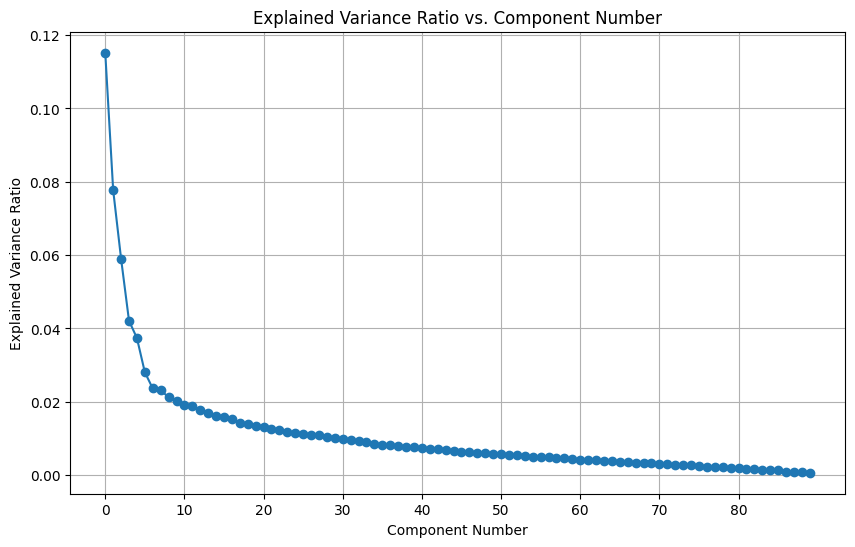

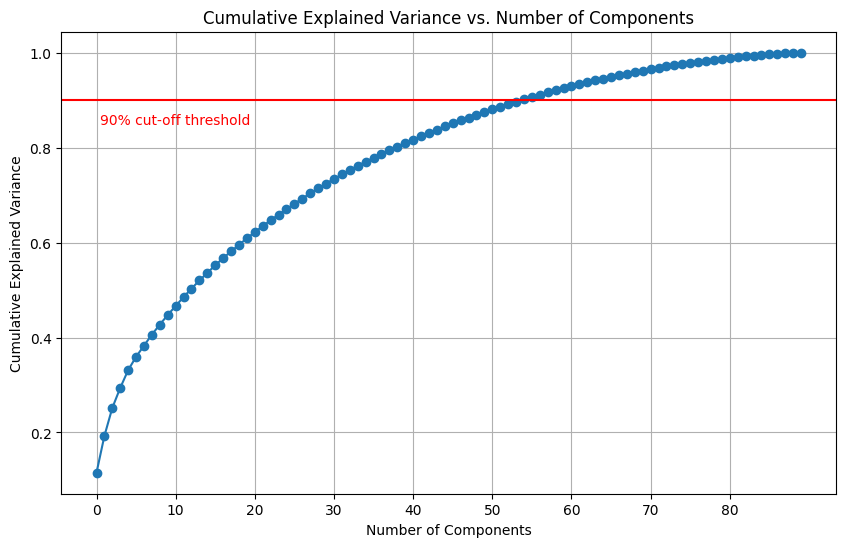

In [79]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

def find_optimal_num_components(X_train_scaled):
    pca = PCA()
    pca.fit(X_train_scaled)

    # Plot della explained variance ratio per ogni componente
    plt.figure(figsize=(10, 6))
    plt.plot(pca.explained_variance_ratio_, marker='o', linestyle='-')
    plt.xlabel('Component Number')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio vs. Component Number')
    plt.grid(True)
    plt.xticks(np.arange(0, len(pca.explained_variance_ratio_), step=10))
    plt.show()

    # Plot della cumulative explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance vs. Number of Components')
    plt.grid(True)
    plt.axhline(y=0.9, color='red', linestyle='-')
    plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=10)
    plt.xticks(np.arange(0, len(pca.explained_variance_ratio_), step=10))
    plt.show()

# Usa questa funzione per trovare il numero ottimale di componenti principali
find_optimal_num_components(X_train_scaled)


In [15]:
# # Calcola la media dei valori assoluti dei carichi per ciascun componente principale
# mean_abs_loadings = loadings.abs().mean()

# # Ordina i carichi in ordine decrescente di importanza
# sorted_loadings = mean_abs_loadings.sort_values(ascending=False)

# print("Componenti Principali più importanti:")
# print(sorted_loadings)


In [80]:
# # Calcola gli autovalori dall'oggetto PCA
# eigenvalues = pca.explained_variance_

# # Visualizza gli autovalori
# print("Autovalori dei Componenti Principali:")
# for i, eig in enumerate(eigenvalues, 1):
#     print(f"PC{i}: {eig}")

# # Puoi anche visualizzarli in un grafico a barre per una migliore comprensione della distribuzione
# plt.bar(range(1, len(eigenvalues) + 1), eigenvalues)
# plt.xlabel('Componente Principale')
# plt.ylabel('Autovalore')
# plt.title('Autovalori dei Componenti Principali')
# plt.show()

In [17]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Considerando che principals_components è un array numpy con tre colonne
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')

# # Estraiamo le colonne per l'asse x, y e z
# x = principals_components_train[:, 0]
# y = principals_components_train[:, 1]
# z = principals_components_train[:, 2]

# # Plot dello scatter tridimensionale
# ax.scatter(x, y, z, c=y_train['Year'], marker='o')

# # Etichette degli assi
# ax.set_xlabel('Componente Principale 1')
# ax.set_ylabel('Componente Principale 2')
# ax.set_zlabel('Componente Principale 3')

# plt.title('Scatter Plot dei Componenti Principali')
# plt.show()


In [18]:
# # Set a threshold for which features to extract
# threshold = 0.3

# # Find features with loadings above the threshold for each principal component
# important_features = {}
# for column in loadings.columns:
#     important_features[column] = loadings.index[loadings[column].abs() > threshold].tolist()

# # Now 'important_features' dictionary contains the important features for each PC
# for pc, features in important_features.items():
#     print(f"{pc}: {', '.join(features)}")

# Modeling

Linear-Regressor

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def linearReg(X_train, y_train, X_test, y_test):
    #Linear-Regressor
    reg = LinearRegression().fit(X_train, y_train)

    predizioni = reg.predict(X_test)

    mse = mean_squared_error(y_test, predizioni)
    print("Mean Squared Error (MSE):", mse)

    r_squared = r2_score(y_test, predizioni)
    print("Coefficienti di determinazione R²:", r_squared)

In [42]:
linearReg(X_train, y_train, X_test, y_test)
linearReg(X_train_minmax, y_train, X_test_minmax, y_test)
linearReg(X_train_scaled, y_train, X_test_scaled, y_test)
linearReg(principals_components_train, y_train, principals_components_test, y_test)

Mean Squared Error (MSE): 84.06098943629034
Coefficienti di determinazione R²: 0.2305423370961881
Mean Squared Error (MSE): 84.06098943629036
Coefficienti di determinazione R²: 0.230542337096188
Mean Squared Error (MSE): 84.06098943629036
Coefficienti di determinazione R²: 0.230542337096188
Mean Squared Error (MSE): 105.97465561853107
Coefficienti di determinazione R²: 0.029954187000469146


Random-Forest-Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

def randomForest(X_train, y_train, X_test, y_test, n_alberi):
    rf_regressor = RandomForestRegressor(n_estimators=n_alberi, random_state=42)
    rf_regressor.fit(X_train, y_train)
    rf_predictions = rf_regressor.predict(X_test)
    mse = mean_squared_error(y_test, rf_predictions)
    r_squared = r2_score(y_test, rf_predictions)

    print("Mean Squared Error (MSE):", mse)
    print("Coefficienti di determinazione R²:", r_squared)

In [44]:
# randomForest(principals_components_train, y_train, principals_components_test, y_test, 100)

In [25]:
# from sklearn.ensemble import RandomForestRegressor

# n_estimators_values = [10, 50, 100, 200, 300]
# mse_values = []

# for n_estimators in n_estimators_values:
#     modello_random_forest = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    
#     modello_random_forest.fit(X_train, y_train)
    
#     predizioni_val = modello_random_forest.predict(X_val)
    
#     mse_val = mean_squared_error(y_val, predizioni_val)
    
#     mse_values.append(mse_val)

# # Plot dei risultati
# plt.figure(figsize=(10, 6))
# plt.plot(n_estimators_values, mse_values, marker='o', linestyle='-')
# plt.title('MSE al variare del numero di alberi nel RandomForestRegressor')
# plt.xlabel('Numero di alberi')
# plt.ylabel('MSE')
# plt.grid(True)
# plt.show()

SVM

In [45]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVR

def svr(num_fold, X_train, y_train, X_test, y_test):
    # Definisci la griglia dei parametri da testare
    param_grid = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [1, 10, 50, 100]
    }

    # Inizializza il regressore SVM
    svm_regressor = SVR()

    # Definisci il numero di fold per la cross-validation
    num_folds = num_fold

    # Inizializza il KFold
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Crea un oggetto GridSearchCV per trovare i migliori parametri con la k-fold cross-validation
    grid_search = GridSearchCV(estimator=svm_regressor, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')

    # Esegui la cross-validation per trovare i migliori parametri
    grid_search.fit(X_train, y_train)

    # Stampa i migliori parametri trovati
    print("Migliori parametri:", grid_search.best_params_)

    # Valuta il modello con la migliore combinazione di parametri
    best_svm_regressor = grid_search.best_estimator_

    # Valuta il modello sui dati di test
    y_pred = best_svm_regressor.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error sui dati di test:", mse_test)

In [46]:
# svr(5, principals_components_train, y_train, principals_components_test, y_test)

KNN

In [50]:
from sklearn.neighbors import KNeighborsRegressor
def knn(num_neig, X_train, y_train, X_test, y_test):
    neig = KNeighborsRegressor(n_neighbors=num_neig)
    neig.fit(X_train, y_train)
    y_pred = neig.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error sui dati di test:", mse_test)
    r_squared = r2_score(y_test, y_pred)
    print("Coefficienti di determinazione R²:", r_squared)


In [28]:
X_train, X_val, y_train, y_val, X_test, y_test = my_train_validation_test()
X_train_scaled, X_test_scaled, X_val_scaled = standardization(X_val)
principals_components_train, principals_components_test, principals_components_val = f_pca(5, X_val_scaled)

In [47]:
def knn_cv(X_train, y_train, X_val, y_val):
    # Definisci il range di iperparametri per il numero di vicini
    param_grid = {'n_neighbors': np.arange(1, 21)}

    # Inizializza il KNN Regressor
    knn = KNeighborsRegressor()

    # Inizializza la ricerca grid
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    grid_search.fit(X_train, y_train)

    # Estrai i risultati della ricerca grid
    train_scores = np.sqrt(-grid_search.cv_results_['mean_train_score']) # Mean Squared Error sul train set
    test_scores = np.sqrt(-grid_search.cv_results_['mean_test_score']) # Mean Squared Error sul test set
    neighbors = param_grid['n_neighbors'] # Numero di vicini

    # Plot dell'ampliamento dell'errore al variare del numero di vicini
    plt.figure(figsize=(10, 6))
    plt.plot(neighbors, train_scores, label='Train Error', marker='o')
    plt.plot(neighbors, test_scores, label='Validation Error', marker='o')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('RMSE')
    plt.title('KNN Regression - Validation Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Trova il miglior modello
    best_neighbor = grid_search.best_params_['n_neighbors']
    best_model = grid_search.best_estimator_

    # Valida il miglior modello sul validation set
    y_pred_val = best_model.predict(X_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    r_squared_val = r2_score(y_val, y_pred_val)

    print("Miglior numero di vicini:", best_neighbor)
    print("Mean Squared Error sui dati di validation:", mse_val)
    print("Coefficienti di determinazione R² sui dati di validation:", r_squared_val)

In [48]:
# knn_cv(principals_components_train, y_train, principals_components_val, y_val)

Feed-Forward

modelli deep per Tabular Data (TabNet &
TabTransformer)